# Import libraries

In [65]:
library(tidyverse)
library(Cairo)
options(warn=-1)

# color blind palette
# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
cbPalette <- c("#666666", "#E69F00", "#56B4E9", 
               "#009E73", "#CC79A7", "#0072B2", "#D55E00", "#F0E442")

theme_set(theme_classic(base_family = "Helvetica", base_size = 8) +
theme(          
  strip.background = element_blank(),
  strip.text.x = element_text(size = 8),
  axis.line = element_line(size = .25),
  axis.ticks = element_line(size = .25),
  axis.text.x = element_text(size = 8, color = 'black'),
  axis.text.y = element_text(size = 8, color = 'black'),
  legend.text = element_text(size = 8)
    
))

# Load aa data

In [66]:
datafiles <- '../rawdata/lc_ms/suppfig1/processeddata/'  %>% 
  list.files(pattern = "csv$", full.names = T)
samplenames <- datafiles %>% 
  stringr::str_match("/([^_/]+)[^/]+$") %>% 
  magrittr::extract(,2)
data <- datafiles %>% 
  lapply(. %>% read_csv(col_types = c(col_character()))) %>% 
  magrittr::set_names(samplenames) %>% 
  bind_rows(.id = 'aa') %>% 
  mutate(sample = stringr::str_replace(sample, '-','\u2013')) %>% 
  mutate(sampleorder = c(1,2,3,7,8,9,4,5,6,10,11,12)) %>% 
  mutate(sample = forcats::fct_reorder(sample, sampleorder)) %>% 
  arrange(sampleorder) %>% 
  print

# A tibble: 12 x 6
           aa sample    level      sem  time sampleorder
        <chr> <fctr>    <dbl>    <dbl> <int>       <dbl>
 1   arginine   Rich 1.136845 0.153981     3           1
 2   arginine   –Leu 1.833748 0.012543     3           2
 3   arginine   –Arg 0.012781 0.000690     3           3
 4    leucine   Rich 1.155133 0.110575     3           4
 5    leucine   –Leu 0.000000 0.000000     3           5
 6    leucine   –Arg 1.258871 0.011054     3           6
 7 isoleucine   Rich 0.900898 0.086238     3           7
 8 isoleucine   –Leu 0.989874 0.019571     3           8
 9 isoleucine   –Arg 0.981804 0.008621     3           9
10     serine   Rich 0.993107 0.052856     3          10
11     serine   –Leu 1.003063 0.012879     3          11
12     serine   –Arg 1.040921 0.022397     3          12


# Plot AA levels (supp fig. 1b)

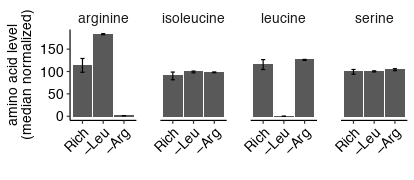

In [69]:
options(repr.plot.width = 3.45, repr.plot.height = 1.5)

data %>% 
  ggplot(aes(x = sample, y = level * 100)) +
  geom_col() +
  geom_errorbar(aes(ymin = (level - sem)*100,
                    ymax = (level + sem)*100), 
                width = 0.2, size = 0.25)  +
  facet_wrap('aa', ncol = 4, scales = "free_x") +
  xlab("") + ylab("amino acid level\n(median normalized)") +
  theme(panel.spacing = unit(1, "lines"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +

ggsave("../figures/suppfig1b.pdf", width = 3.45, height = 1.5, device = cairo_pdf)